<a href="https://colab.research.google.com/github/skaty5678/customer_churn_prediction/blob/main/customer_churn_predict_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd

excel_file_path = '/content/drive/MyDrive/customer_churn_large_dataset.xlsx'

df = pd.read_excel(excel_file_path)

# Preliminary Check

In [67]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [68]:
df.shape

(100000, 9)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [70]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [71]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [72]:
df['Age'].nunique()

53

In [73]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

### Upon an initial inspection, the dataset demonstrates nearly perfect balance between the classes, and there appear to be no substantial outliers. This situation presents both advantages and challenges for model creation. While the balanced distribution contributes positively to training, the absence of clear outliers indicates that crafting decision boundaries between the classes could be intricate. This categorization might be considered a "hard" classification problem, as distinct class boundaries are challenging to establish and traditional models may struggle to distinguish the two classes effectively.

# Univariate Exploratory data analysis

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

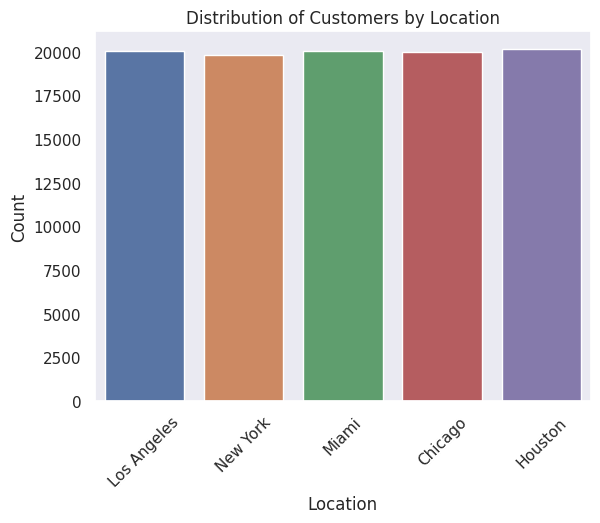

In [75]:
sns.set(style="dark")
# plt.figure(figsize=(10, 6))

sns.countplot(data=df, x="Location")

plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Distribution of Customers by Location")

plt.xticks(rotation=45)

plt.show()

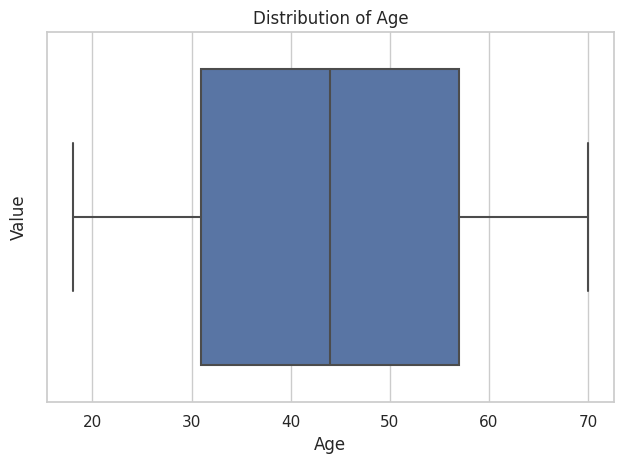

In [76]:
sns.set(style="whitegrid")

# plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])

plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

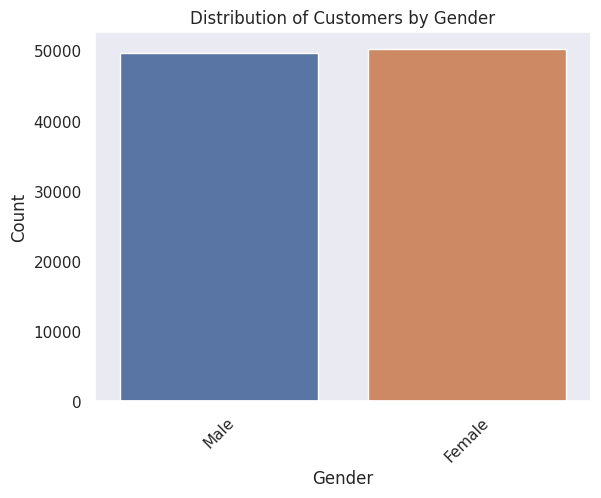

In [77]:
sns.set(style="dark")
# plt.figure(figsize=(10, 6))

sns.countplot(data=df, x="Gender")

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Customers by Gender")

plt.xticks(rotation=45)

plt.show()

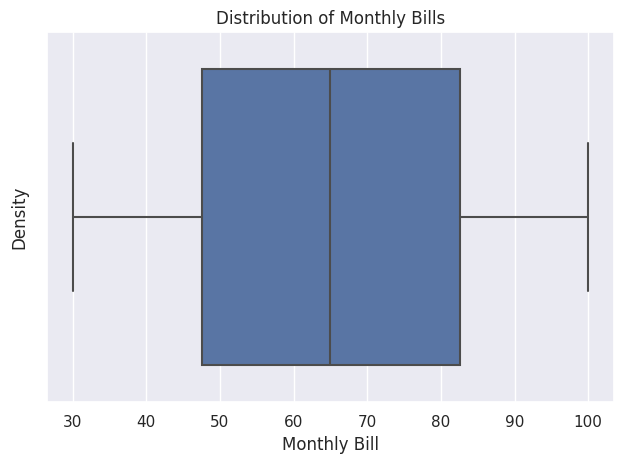

In [78]:
sns.set(style="darkgrid")

# plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Monthly_Bill'])

plt.xlabel('Monthly Bill')
plt.ylabel('Density')
plt.title('Distribution of Monthly Bills')

plt.tight_layout()
plt.show()

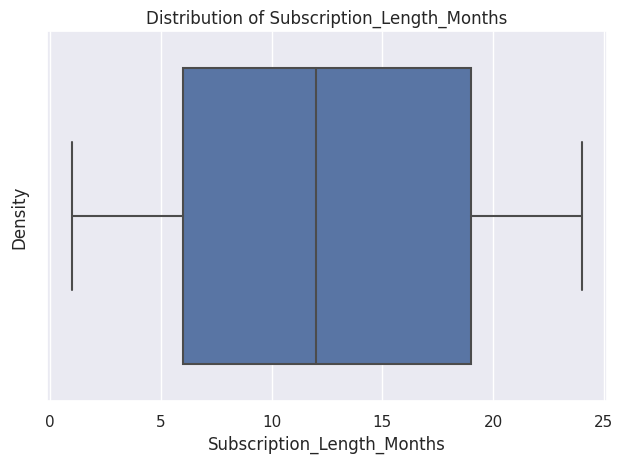

In [79]:
sns.set(style="darkgrid")

# plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Subscription_Length_Months'])

plt.xlabel('Subscription_Length_Months')
plt.ylabel('Density')
plt.title('Distribution of Subscription_Length_Months')

plt.tight_layout()
plt.show()

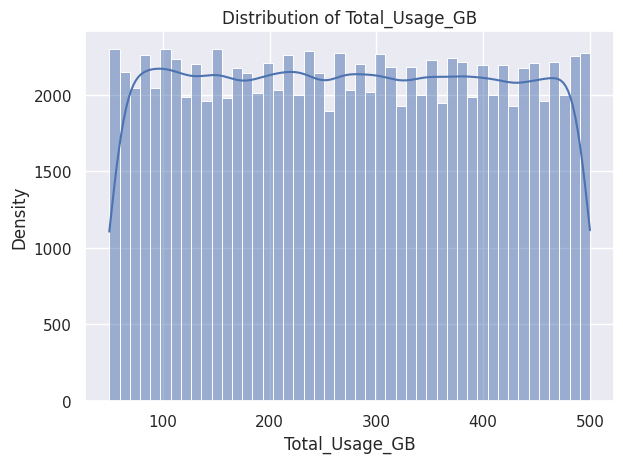

In [80]:
# plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Usage_GB'], kde=True)

plt.xlabel('Total_Usage_GB')
plt.ylabel('Density')
plt.title('Distribution of Total_Usage_GB')

plt.tight_layout()
plt.show()

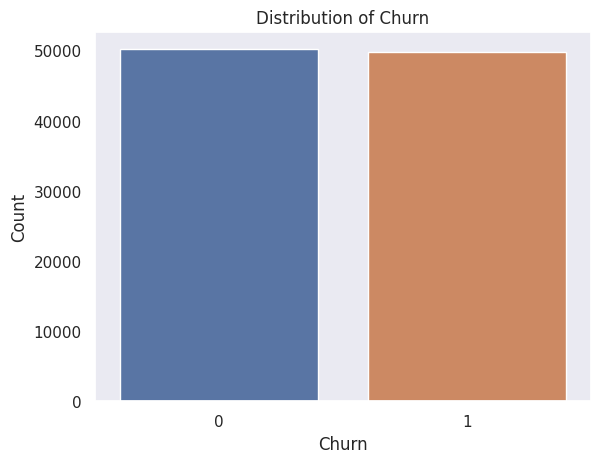

In [81]:
sns.set(style="dark")
# plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(data=df, x="Churn")

plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churn")

plt.show()

# Bivariate Exploratory data analysis

<Figure size 1200x600 with 0 Axes>

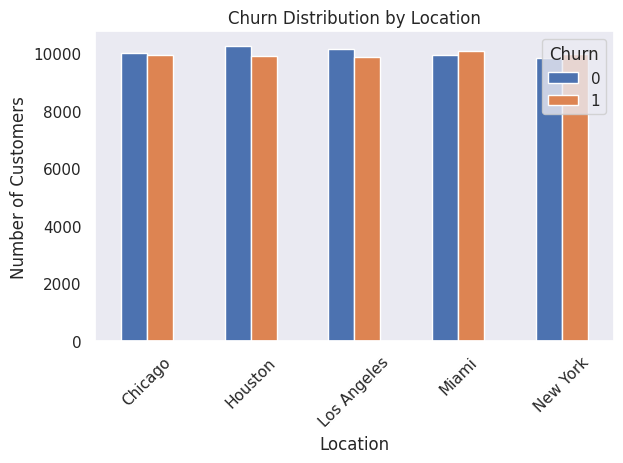

In [82]:
sns.set(style="dark")

churn_counts = df.groupby(['Location', 'Churn']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
churn_counts.plot(kind='bar', stacked=False)

plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution by Location')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-83-1eb22e8be9eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


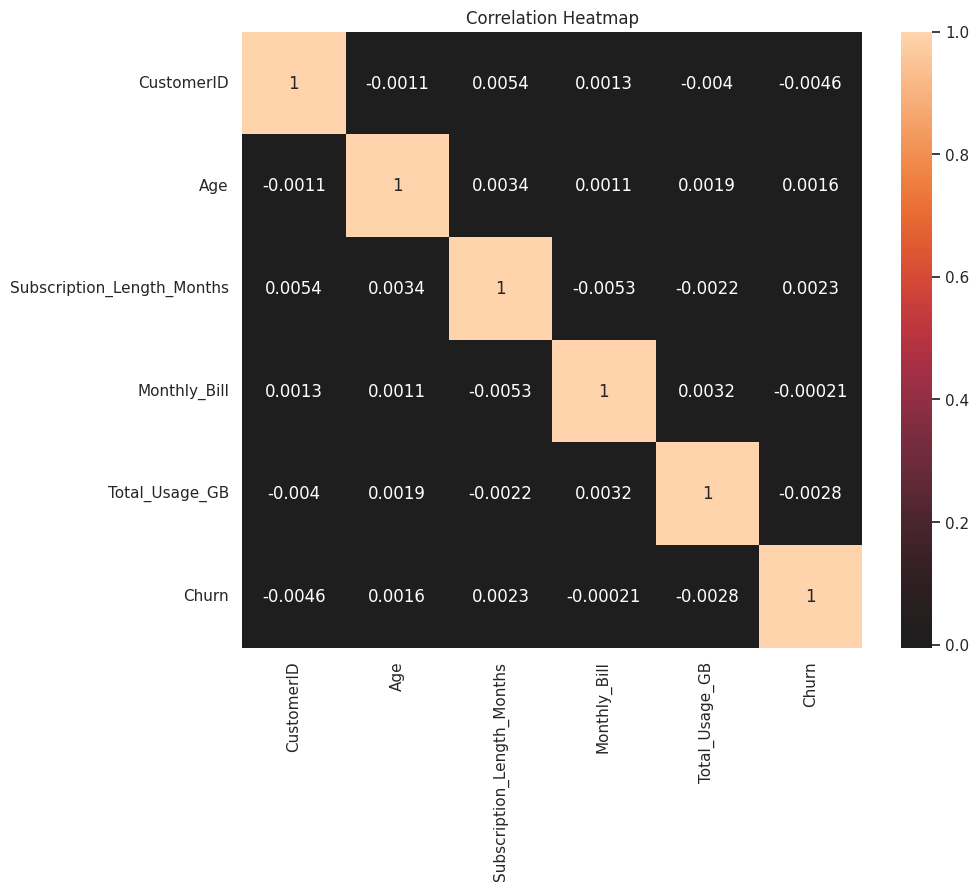

In [83]:
# Compute the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, center=0)

plt.title('Correlation Heatmap')

plt.show()

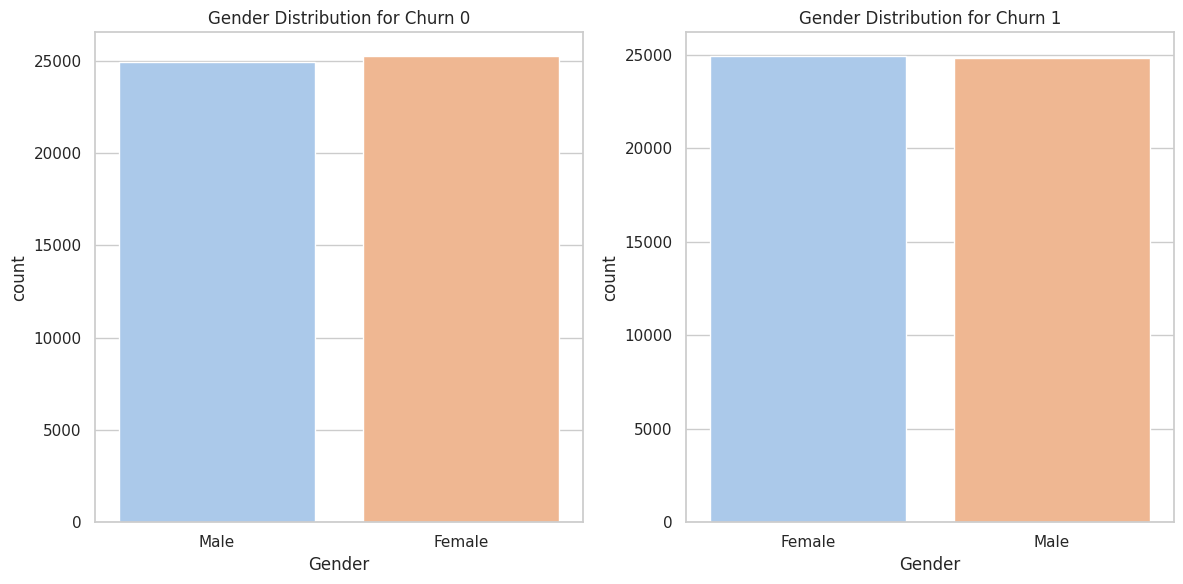

In [84]:
sns.set(style="whitegrid")

# Filter the dataset by churn categories
churn_0_data = df[df['Churn'] == 0]
churn_1_data = df[df['Churn'] == 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Churn 0
sns.countplot(x='Gender', data=churn_0_data, ax=axes[0], palette="pastel")
axes[0].set_title("Gender Distribution for Churn 0")

# Plot for Churn 1
sns.countplot(x='Gender', data=churn_1_data, ax=axes[1], palette="pastel")
axes[1].set_title("Gender Distribution for Churn 1")

plt.tight_layout()
plt.show()


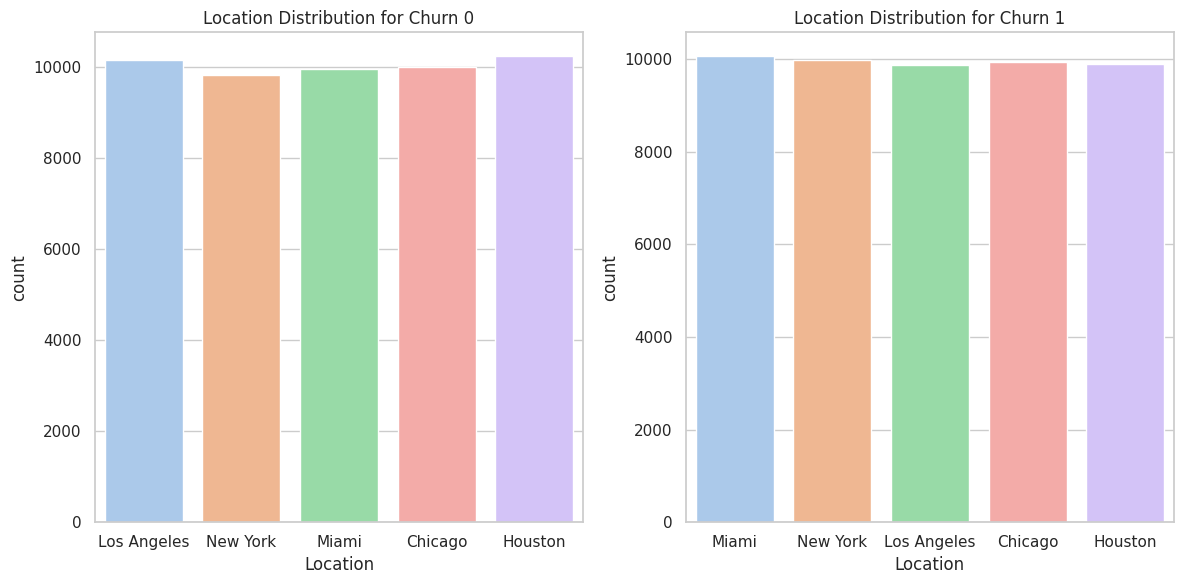

In [85]:
sns.set(style="whitegrid")

churn_0_data = df[df['Churn'] == 0]
churn_1_data = df[df['Churn'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Location', data=churn_0_data, ax=axes[0], palette="pastel")
axes[0].set_title("Location Distribution for Churn 0")

sns.countplot(x='Location', data=churn_1_data, ax=axes[1], palette="pastel")
axes[1].set_title("Location Distribution for Churn 1")

plt.tight_layout()
plt.show()

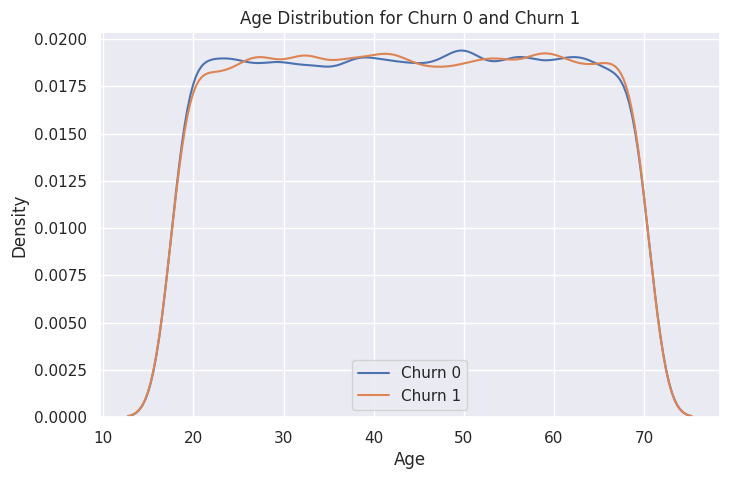

In [86]:
sns.set(style="darkgrid")

churn_0_data = df[df['Churn'] == 0]
churn_1_data = df[df['Churn'] == 1]

plt.figure(figsize=(8, 5))
sns.kdeplot(data=churn_0_data['Age'], label='Churn 0', fill=False)
sns.kdeplot(data=churn_1_data['Age'], label='Churn 1', fill=False)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution for Churn 0 and Churn 1')

plt.legend()
plt.show()

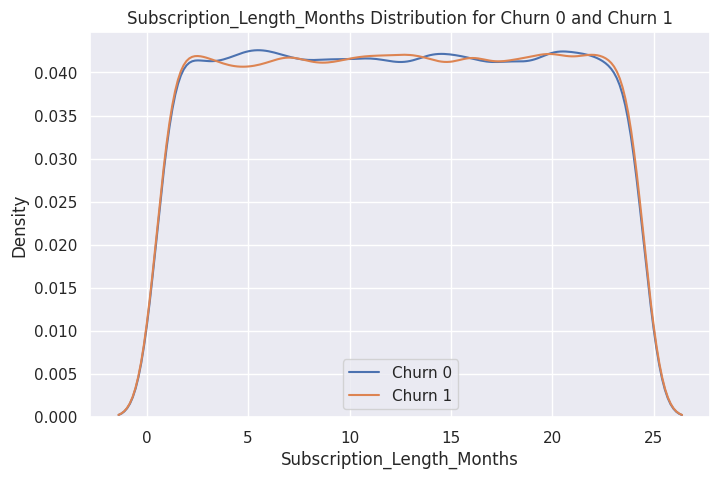

In [87]:
sns.set(style="darkgrid")

churn_0_data = df[df['Churn'] == 0]
churn_1_data = df[df['Churn'] == 1]

plt.figure(figsize=(8, 5))
sns.kdeplot(data=churn_0_data['Subscription_Length_Months'], label='Churn 0', fill=False)
sns.kdeplot(data=churn_1_data['Subscription_Length_Months'], label='Churn 1', fill=False)

plt.xlabel('Subscription_Length_Months')
plt.ylabel('Density')
plt.title('Subscription_Length_Months Distribution for Churn 0 and Churn 1')

plt.legend()
plt.show()

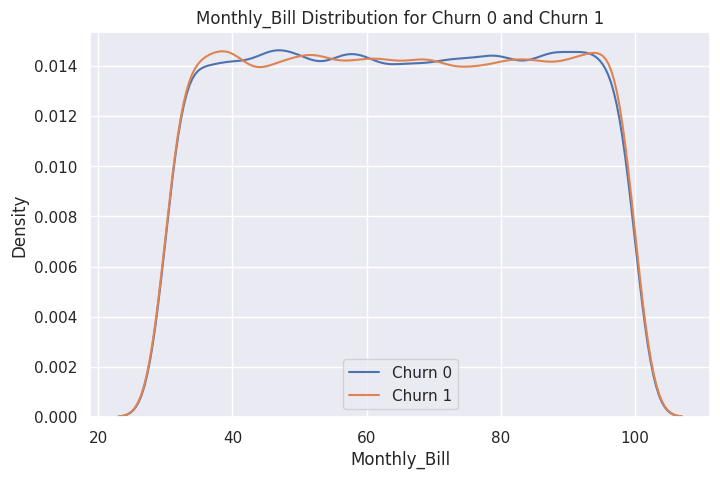

In [88]:
sns.set(style="darkgrid")

churn_0_data = df[df['Churn'] == 0]
churn_1_data = df[df['Churn'] == 1]

plt.figure(figsize=(8, 5))
sns.kdeplot(data=churn_0_data['Monthly_Bill'], label='Churn 0', fill=False)
sns.kdeplot(data=churn_1_data['Monthly_Bill'], label='Churn 1', fill=False)

plt.xlabel('Monthly_Bill')
plt.ylabel('Density')
plt.title('Monthly_Bill Distribution for Churn 0 and Churn 1')

plt.legend()
plt.show()

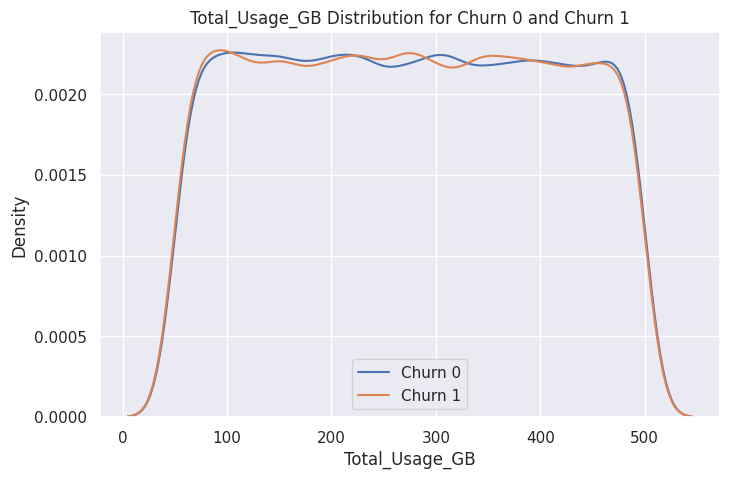

In [89]:
sns.set(style="darkgrid")

churn_0_data = df[df['Churn'] == 0]
churn_1_data = df[df['Churn'] == 1]

plt.figure(figsize=(8, 5))
sns.kdeplot(data=churn_0_data['Total_Usage_GB'], label='Churn 0', fill=False)
sns.kdeplot(data=churn_1_data['Total_Usage_GB'], label='Churn 1', fill=False)

plt.xlabel('Total_Usage_GB')
plt.ylabel('Density')
plt.title('Total_Usage_GB Distribution for Churn 0 and Churn 1')

plt.legend()
plt.show()

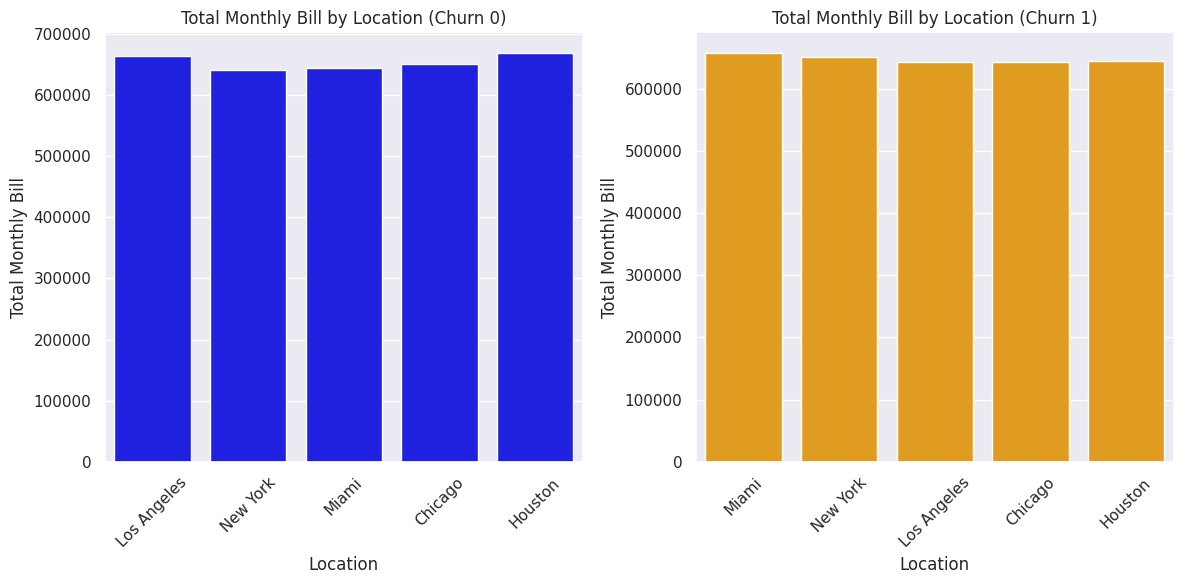

In [90]:
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Location', y='Monthly_Bill', data=churn_0, estimator=sum, errorbar=None, ax=axs[0], color='blue')
axs[0].set_title('Total Monthly Bill by Location (Churn 0)')
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Total Monthly Bill')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Location', y='Monthly_Bill', data=churn_1, estimator=sum, errorbar=None, ax=axs[1], color='orange')
axs[1].set_title('Total Monthly Bill by Location (Churn 1)')
axs[1].set_xlabel('Location')
axs[1].set_ylabel('Total Monthly Bill')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### My preliminary assumptions about the dataset's distribution appear to hold true after a comprehensive analysis of both univariate and bivariate aspects. This detailed exploration reinforces my understanding of the balanced class distribution and the absence of significant outliers. As a result, I can move forward with more confidence, aware that the task involves a nuanced classification challenge due to the lack of well-defined class boundaries. This scenario calls for advanced modeling techniques that can handle intricate decision boundaries and capture subtle patterns within the data.

# Feature Enginnering

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
pre_df = df.copy()

In [93]:
columns_to_drop = ['CustomerID', 'Name']
pre_df = pre_df.drop(columns=columns_to_drop)

In [94]:
# Define age group bins and labels
age_bins = [0, 17, 30, 45, 60, 100]
age_labels = ['Teen','Young Adult', 'Adult', 'Middle-Aged', 'Senior']

pre_df['Age_Group'] = pd.cut(pre_df['Age'], bins=age_bins, labels=age_labels, right=False)

pre_df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group
0,63,Male,Los Angeles,17,73.36,236,0,Senior
1,62,Female,New York,1,48.76,172,0,Senior
2,24,Female,Los Angeles,5,85.47,460,0,Young Adult
3,36,Female,Miami,3,97.94,297,1,Adult
4,46,Female,Miami,19,58.14,266,0,Middle-Aged


In [95]:
label_encoder = LabelEncoder()

pre_df['Gender_Encoded'] = label_encoder.fit_transform(pre_df['Gender'])

pre_df.drop('Gender', axis=1, inplace=True)

pre_df.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded
0,63,Los Angeles,17,73.36,236,0,Senior,1
1,62,New York,1,48.76,172,0,Senior,0
2,24,Los Angeles,5,85.47,460,0,Young Adult,0
3,36,Miami,3,97.94,297,1,Adult,0
4,46,Miami,19,58.14,266,0,Middle-Aged,0


In [96]:
# Define bin edges and labels
bin_edges = [0, 6, 12, 18, 24]
bin_labels = ['Very Short', 'Short', 'Medium', 'Long']

# Create a new column 'Subscription_Length_Bins'
pre_df['Subscription_Length_Bins'] = pd.cut(pre_df['Subscription_Length_Months'], bins=bin_edges, labels=bin_labels, include_lowest=True)

pre_df.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded,Subscription_Length_Bins
0,63,Los Angeles,17,73.36,236,0,Senior,1,Medium
1,62,New York,1,48.76,172,0,Senior,0,Very Short
2,24,Los Angeles,5,85.47,460,0,Young Adult,0,Very Short
3,36,Miami,3,97.94,297,1,Adult,0,Very Short
4,46,Miami,19,58.14,266,0,Middle-Aged,0,Long


In [97]:
# Create the new feature 'Billing_Per_Usage_Ratio'
pre_df['Billing_Per_Usage_Ratio'] = pre_df['Monthly_Bill'] / pre_df['Total_Usage_GB']

pre_df.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded,Subscription_Length_Bins,Billing_Per_Usage_Ratio
0,63,Los Angeles,17,73.36,236,0,Senior,1,Medium,0.310847
1,62,New York,1,48.76,172,0,Senior,0,Very Short,0.283488
2,24,Los Angeles,5,85.47,460,0,Young Adult,0,Very Short,0.185804
3,36,Miami,3,97.94,297,1,Adult,0,Very Short,0.329764
4,46,Miami,19,58.14,266,0,Middle-Aged,0,Long,0.218571


#### The Billing_Per_Usage_Ratio feature can provide insights into how cost-effective a customer's usage of the service is in terms of their monthly billing amount.

#### High Ratio: A higher value of this ratio indicates that the customer is getting more value from their monthly billing amount in terms of data usage.

In [98]:
# Create the feature 'Total_Billing'
pre_df['Total_Billing'] = pre_df['Monthly_Bill'] * pre_df['Subscription_Length_Months']

pre_df.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded,Subscription_Length_Bins,Billing_Per_Usage_Ratio,Total_Billing
0,63,Los Angeles,17,73.36,236,0,Senior,1,Medium,0.310847,1247.12
1,62,New York,1,48.76,172,0,Senior,0,Very Short,0.283488,48.76
2,24,Los Angeles,5,85.47,460,0,Young Adult,0,Very Short,0.185804,427.35
3,36,Miami,3,97.94,297,1,Adult,0,Very Short,0.329764,293.82
4,46,Miami,19,58.14,266,0,Middle-Aged,0,Long,0.218571,1104.66


In [100]:
# Create the feature 'Usage_Per_Month'
pre_df['Engagement_Index'] = pre_df['Total_Usage_GB'] / pre_df['Subscription_Length_Months']

pre_df.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded,Subscription_Length_Bins,Billing_Per_Usage_Ratio,Total_Billing,Engagement_Index
0,63,Los Angeles,17,73.36,236,0,Senior,1,Medium,0.310847,1247.12,13.882353
1,62,New York,1,48.76,172,0,Senior,0,Very Short,0.283488,48.76,172.000000
2,24,Los Angeles,5,85.47,460,0,Young Adult,0,Very Short,0.185804,427.35,92.000000
3,36,Miami,3,97.94,297,1,Adult,0,Very Short,0.329764,293.82,99.000000
4,46,Miami,19,58.14,266,0,Middle-Aged,0,Long,0.218571,1104.66,14.000000


In [101]:
# Create a new column 'Usage_Billing_Ratio'
pre_df['Usage_Billing_Ratio'] = pre_df['Total_Usage_GB'] / pre_df['Monthly_Bill']

pre_df.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded,Subscription_Length_Bins,Billing_Per_Usage_Ratio,Total_Billing,Engagement_Index,Usage_Billing_Ratio
0,63,Los Angeles,17,73.36,236,0,Senior,1,Medium,0.310847,1247.12,13.882353,3.217012
1,62,New York,1,48.76,172,0,Senior,0,Very Short,0.283488,48.76,172.000000,3.527482
2,24,Los Angeles,5,85.47,460,0,Young Adult,0,Very Short,0.185804,427.35,92.000000,5.382005
3,36,Miami,3,97.94,297,1,Adult,0,Very Short,0.329764,293.82,99.000000,3.032469
4,46,Miami,19,58.14,266,0,Middle-Aged,0,Long,0.218571,1104.66,14.000000,4.575163


In [102]:
encoded_locations = pd.get_dummies(pre_df['Location'])

pre_df = pd.concat([pre_df, encoded_locations], axis=1)

pre_df.drop('Location', axis=1, inplace=True)

pre_df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Gender_Encoded,Subscription_Length_Bins,Billing_Per_Usage_Ratio,Total_Billing,Engagement_Index,Usage_Billing_Ratio,Chicago,Houston,Los Angeles,Miami,New York
0,63,17,73.36,236,0,Senior,1,Medium,0.310847,1247.12,13.882353,3.217012,0,0,1,0,0
1,62,1,48.76,172,0,Senior,0,Very Short,0.283488,48.76,172.000000,3.527482,0,0,0,0,1
2,24,5,85.47,460,0,Young Adult,0,Very Short,0.185804,427.35,92.000000,5.382005,0,0,1,0,0
3,36,3,97.94,297,1,Adult,0,Very Short,0.329764,293.82,99.000000,3.032469,0,0,0,1,0
4,46,19,58.14,266,0,Middle-Aged,0,Long,0.218571,1104.66,14.000000,4.575163,0,0,0,1,0


In [103]:
enc_age_groups = pd.get_dummies(pre_df['Age_Group'])

pre_df = pd.concat([pre_df, enc_age_groups], axis=1)

pre_df.drop('Age_Group', axis=1, inplace=True)

pre_df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Encoded,Subscription_Length_Bins,Billing_Per_Usage_Ratio,Total_Billing,Engagement_Index,...,Chicago,Houston,Los Angeles,Miami,New York,Teen,Young Adult,Adult,Middle-Aged,Senior
0,63,17,73.36,236,0,1,Medium,0.310847,1247.12,13.882353,...,0,0,1,0,0,0,0,0,0,1
1,62,1,48.76,172,0,0,Very Short,0.283488,48.76,172.000000,...,0,0,0,0,1,0,0,0,0,1
2,24,5,85.47,460,0,0,Very Short,0.185804,427.35,92.000000,...,0,0,1,0,0,0,1,0,0,0
3,36,3,97.94,297,1,0,Very Short,0.329764,293.82,99.000000,...,0,0,0,1,0,0,0,1,0,0
4,46,19,58.14,266,0,0,Long,0.218571,1104.66,14.000000,...,0,0,0,1,0,0,0,0,1,0


In [104]:
sub_len_encoded = pd.get_dummies(pre_df['Subscription_Length_Bins'])

pre_df = pd.concat([pre_df, sub_len_encoded], axis=1)

pre_df.drop('Subscription_Length_Bins', axis=1, inplace=True)

pre_df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Encoded,Billing_Per_Usage_Ratio,Total_Billing,Engagement_Index,Usage_Billing_Ratio,...,New York,Teen,Young Adult,Adult,Middle-Aged,Senior,Very Short,Short,Medium,Long
0,63,17,73.36,236,0,1,0.310847,1247.12,13.882353,3.217012,...,0,0,0,0,0,1,0,0,1,0
1,62,1,48.76,172,0,0,0.283488,48.76,172.000000,3.527482,...,1,0,0,0,0,1,1,0,0,0
2,24,5,85.47,460,0,0,0.185804,427.35,92.000000,5.382005,...,0,0,1,0,0,0,1,0,0,0
3,36,3,97.94,297,1,0,0.329764,293.82,99.000000,3.032469,...,0,0,0,1,0,0,1,0,0,0
4,46,19,58.14,266,0,0,0.218571,1104.66,14.000000,4.575163,...,0,0,0,0,1,0,0,0,0,1


In [105]:
pre_df.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Encoded', 'Billing_Per_Usage_Ratio', 'Total_Billing',
       'Engagement_Index', 'Usage_Billing_Ratio', 'Chicago', 'Houston',
       'Los Angeles', 'Miami', 'New York', 'Teen', 'Young Adult', 'Adult',
       'Middle-Aged', 'Senior', 'Very Short', 'Short', 'Medium', 'Long'],
      dtype='object')

# Model Preparation

In [106]:
ml_df = pre_df.copy()

### Check for multicollinearity

In [107]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for VIF calculation
numeric_columns = ml_df.select_dtypes(include=['int64', 'float64']).columns

# Drop the target variable ('Churn') for calculating VIF
predictors = ml_df[numeric_columns].drop('Churn', axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif_data)

                      Feature        VIF
0                         Age   8.488096
1  Subscription_Length_Months  29.830710
2                Monthly_Bill  45.662008
3              Total_Usage_GB  60.612533
4              Gender_Encoded   1.970720
5     Billing_Per_Usage_Ratio   9.064211
6               Total_Billing  31.050569
7            Engagement_Index   2.505835
8         Usage_Billing_Ratio  29.388750


In [108]:
#drop the highly multicollinear columns
ml_df.drop(columns=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'],inplace=True)

In [109]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for VIF calculation
numeric_columns = ml_df.select_dtypes(include=['int64', 'float64']).columns

# Drop the target variable ('Churn') for calculating VIF
predictors = ml_df[numeric_columns].drop('Churn', axis=1)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display VIF results
print(vif_data)


                   Feature       VIF
0           Gender_Encoded  1.909746
1  Billing_Per_Usage_Ratio  2.301069
2            Total_Billing  3.190450
3         Engagement_Index  1.699476
4      Usage_Billing_Ratio  2.799059


In [110]:
ml_df.drop(columns=['Chicago','Teen','Very Short'],inplace=True)

### Train Test Split

In [112]:
X = ml_df.drop('Churn', axis=1)
y = ml_df['Churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the dataset

In [113]:
from sklearn.preprocessing import StandardScaler

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Transform the test data using the same scaler
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.4945
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

Confusion Matrix:
 [[5228 4851]
 [5259 4662]]


In [116]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5054
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.61      0.55     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.51      0.50     20000

Confusion Matrix:
 [[6144 3935]
 [5957 3964]]


In [117]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.50135
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     10079
           1       0.50      0.46      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[5417 4662]
 [5311 4610]]


In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Build a neural network model
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6961 - accuracy: 0.5002 - val_loss: 0.6934 - val_accuracy: 0.4997
Epoch 2/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6930 - val_accuracy: 0.5099
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5001
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 7/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy:

### the results were surely no better than rendom guessing and even if we did hypermparamter tuning it won't make that much of a difference.

### So we will try applying PCA and then do the model training to check if it makes any difference or not

# Principal component analysis

In [126]:
from sklearn.decomposition import PCA

# Select only numeric columns for PCA
numeric_columns = pre_df.select_dtypes(include=['int64', 'float64','uint8']).columns

# Separate target variable 'Churn'
X = pre_df[numeric_columns].drop('Churn', axis=1)
y = pre_df['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Concatenate PCA components with target variable
pca_df = pd.concat([pca_df, y], axis=1)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [1.64084860e-01 1.19157521e-01 1.02659645e-01 6.72034037e-02
 6.26085851e-02 6.07553885e-02 6.01765976e-02 5.68968551e-02
 5.68460791e-02 5.68005936e-02 5.66811114e-02 5.32536284e-02
 4.54444043e-02 1.72929511e-02 1.27937251e-02 2.94617664e-03
 1.71452711e-03 1.67656022e-03 1.00738670e-03 1.45008654e-32
 6.21465449e-33 1.09129725e-33 7.11954469e-38]


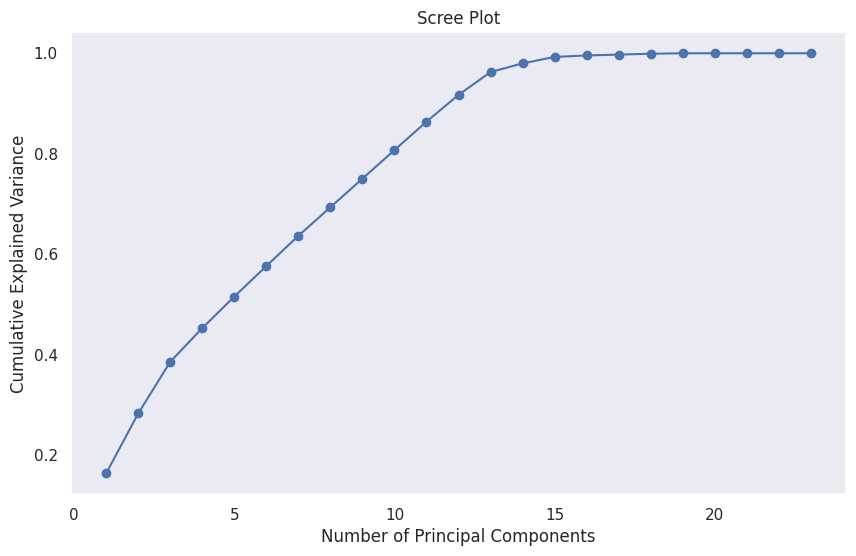

In [127]:
# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [136]:
# Choose the number of principal components to retain
num_components = 15

# Keep the selected number of principal components
X_selected_pca = X_pca[:, :num_components]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_pca, y, test_size=0.2, random_state=42)

In [137]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5009
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.50      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[5244 4835]
 [5147 4774]]


In [138]:
logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.50655
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.61      0.56     10079
           1       0.50      0.40      0.44      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000

Confusion Matrix:
 [[6177 3902]
 [5967 3954]]


In [139]:
xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.49575
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.48      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[5201 4878]
 [5207 4714]]


### Ah, the beloved dataset, the enigma wrapped in a puzzle, refuses to succumb to my modeling prowess. It sits there, gleefully mocking my attempts to predict churn. "Oh, you thought PCA or Neural Network was the silver bullet? Nice try," it seems to say. My model's performance and a random coin toss share a strangely harmonious bond, a testament to the dataset's resilient stubbornness.

### The saga continues with more feature engineering, as if I am dressing up the dataset in various outfits, hoping one will be the magical charm. I throw in the "Billing_Per_Usage_Ratio," hoping to unveil customer billing secrets like a mystical potion. Alas, even this wizardry falls short in the eyes of our defiant dataset.

### As I ponder, lost in the labyrinth of features, I realize that my model's accuracy resembles a coin flip contest a world where the model's crystal ball seems to have cracked. I need features that tell tales, features that shout their significance like a Shakespearean soliloquy, yet the dataset remains silent.


# THE SAGA CONTINUES ...